<a href="https://colab.research.google.com/github/PouyaSonej/car-and-model-detection/blob/main/finetune_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import csv
import cv2

# Download Dataset
Run the codes of this section only one time, it will downlad and store the dataset in your drive

### Mount your drive
First, mount your drive on this notebook. After running the next cell, you can see your google drive directory in Files, the left side of this page.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download cars images

In [ ]:
!wget http://ai.stanford.edu/~jkrause/car196/car_ims.tgz

--2023-10-15 18:48:33--  http://ai.stanford.edu/~jkrause/car196/car_ims.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-10-15 18:48:34 ERROR 404: Not Found.



### Download annotations

In [ ]:
!gdown --id 1XJnWLShjrr47WI_yPCyKBGEWsAKjfnjS
!gdown --id 19mQADQyu9z8hCdsgbIBn6naTv4uXyc0O
!gdown --id 1mrFRxNcu_nZuTeWrSTaeBMblg9ZBWsQw

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XJnWLShjrr47WI_yPCyKBGEWsAKjfnjS
To: /content/annot_test.csv
100% 298k/298k [00:00<00:00, 122MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19mQADQyu9z8hCdsgbIBn6naTv4uXyc0O
To: /content/annot_train.csv
100% 302k/302k [00:00<00:00, 139MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?i

### Move to drive

In [ ]:
!mkdir -p "/content/drive/My Drive/Datasets/Cars/"
!mv "/content/car_ims.tgz" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/annot_train.csv" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/annot_test.csv" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/class_names.csv" "/content/drive/My Drive/Datasets/Cars"

# Load Dataset

In [ ]:
!tar -xzf "/content/drive/My Drive/Datasets/Cars/car_ims.tgz"

In [ ]:
!cp "/content/drive/My Drive/Datasets/Cars/annot_train.csv" "/content/"
!cp "/content/drive/My Drive/Datasets/Cars/annot_test.csv" "/content/"
!cp "/content/drive/My Drive/Datasets/Cars/class_names.csv" "/content/"

In [ ]:
#
with open("annot_train.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter='\t')
    train_list = list(reader)[1:]
    print(train_list)

#
with open("annot_test.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter='\t')
    test_list = list(reader)[1:]
    print(test_list)

#
with open("class_names.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter=',')
    class_names = list(reader)[0]
    num_classes = len(class_names)
    print(class_names)

[['car_ims/000001.jpg,112,7,853,717,1'], ['car_ims/000002.jpg,48,24,441,202,1'], ['car_ims/000003.jpg,7,4,277,180,1'], ['car_ims/000004.jpg,33,50,197,150,1'], ['car_ims/000005.jpg,5,8,83,58,1'], ['car_ims/000006.jpg,10,6,250,110,1'], ['car_ims/000007.jpg,56,1,394,176,1'], ['car_ims/000008.jpg,1,13,113,83,1'], ['car_ims/000009.jpg,15,111,271,272,1'], ['car_ims/000010.jpg,14,18,148,107,1'], ['car_ims/000011.jpg,5,8,91,59,1'], ['car_ims/000012.jpg,29,18,157,86,1'], ['car_ims/000013.jpg,1,1,300,179,1'], ['car_ims/000014.jpg,9,1,152,103,1'], ['car_ims/000015.jpg,4,15,94,63,1'], ['car_ims/000016.jpg,12,16,117,71,1'], ['car_ims/000017.jpg,1,5,160,89,1'], ['car_ims/000018.jpg,46,84,661,428,1'], ['car_ims/000019.jpg,86,81,371,252,1'], ['car_ims/000020.jpg,26,32,677,418,1'], ['car_ims/000021.jpg,50,127,587,396,1'], ['car_ims/000022.jpg,6,9,124,89,1'], ['car_ims/000023.jpg,52,25,751,507,1'], ['car_ims/000024.jpg,3,23,132,98,1'], ['car_ims/000025.jpg,60,76,593,393,1'], ['car_ims/000026.jpg,21,18,4

### Show some samples

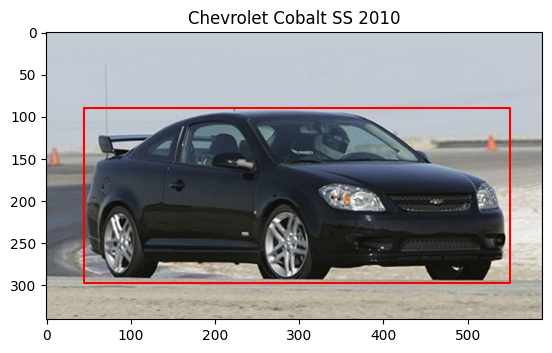

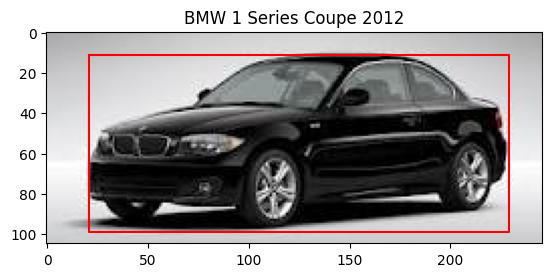

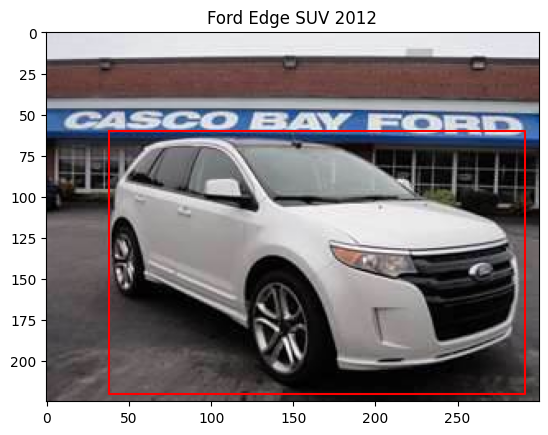

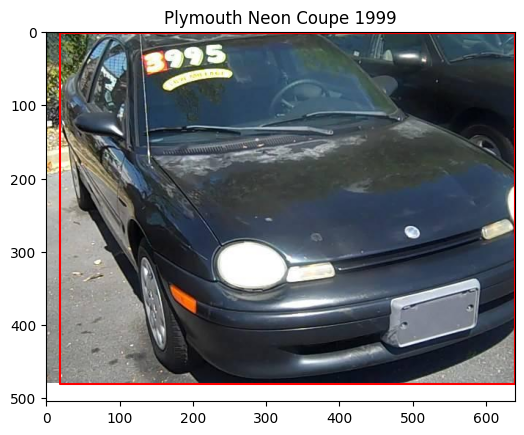

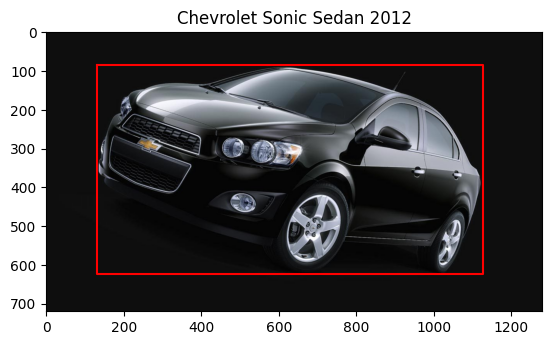

In [ ]:
for i in np.random.randint(0, len(train_list), 5):
    line = train_list[i][0].split(',')
    class_id = int(line[5]) - 1
    image = cv2.imread('/content/' + line[0])
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(class_names[class_id])

    x1 = int(line[1])
    y1 = int(line[2])
    x2 = int(line[3])
    y2 = int(line[4])
    plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


# Train Model

## Define model

In [ ]:
model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights=None)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Create generator

In [ ]:
from keras.applications.resnet import preprocess_input

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, batch_size=32, dim=(224, 224), n_channels=3, n_classes=196, shuffle=True):
        'Initialization'
        self.data = data
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ind in enumerate(indexes):
            line = self.data[ind][0].split(',')
            class_id = int(line[5]) - 1
            image = cv2.imread('/content/' + line[0])
            image = cv2.resize(image, self.dim)
            image = preprocess_input(image)

            # Store sample
            X[i,] = image

            # Store class
            y[i] = class_id

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.data))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


In [ ]:
train_generator = DataGenerator(train_list)
valid_generator = DataGenerator(test_list, shuffle=False)
X, y = train_generator.__getitem__(1)
print(X.shape)
print(y.shape)

(32, 224, 224, 3)
(32, 196)


## Optimize parameters

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1e-3),
              metrics='accuracy')

# Train model on dataset
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50)

Epoch 1/50
254/254 [==============================] - 261s 734ms/step - loss: 5.6444 - accuracy: 0.0071 - val_loss: 5.3369 - val_accuracy: 0.0052
Epoch 2/50
254/254 [==============================] - 182s 718ms/step - loss: 5.3493 - accuracy: 0.0080 - val_loss: 7.8498 - val_accuracy: 0.0071
Epoch 3/50
254/254 [==============================] - 170s 669ms/step - loss: 5.2935 - accuracy: 0.0081 - val_loss: 36.6418 - val_accuracy: 0.0061
Epoch 4/50
254/254 [==============================] - 182s 716ms/step - loss: 5.2693 - accuracy: 0.0107 - val_loss: 146.9260 - val_accuracy: 0.0051
Epoch 5/50
254/254 [==============================] - 174s 685ms/step - loss: 5.2287 - accuracy: 0.0098 - val_loss: 11.8903 - val_accuracy: 0.0067
Epoch 6/50
254/254 [==============================] - 183s 723ms/step - loss: 5.2203 - accuracy: 0.0109 - val_loss: 6.3537 - val_accuracy: 0.0086
Epoch 7/50
254/254 [==============================] - 176s 691ms/step - loss: 5.1844 - accuracy: 0.0122 - val_loss: 5.17

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

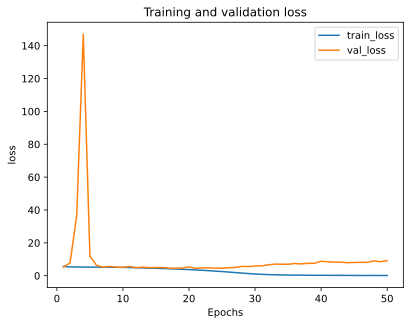

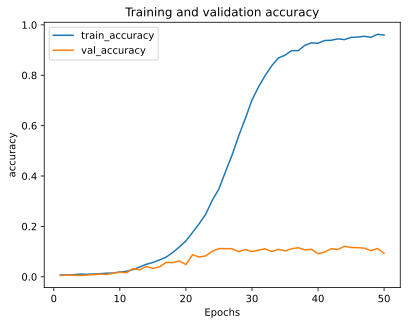

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

# Transfer Learning

In [ ]:
model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False, pooling='avg')
x = keras.layers.Dense(units=196, activation='softmax')(model.output)
model = keras.models.Model(model.input, x)
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics='accuracy')

# Train model on dataset
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    shuffle=False)

Epoch 1/50
254/254 [==============================] - 231s 703ms/step - loss: 5.1902 - accuracy: 0.0127 - val_loss: 8.2282 - val_accuracy: 0.0090
Epoch 2/50
254/254 [==============================] - 174s 687ms/step - loss: 4.6457 - accuracy: 0.0370 - val_loss: 6.3386 - val_accuracy: 0.0238
Epoch 3/50
254/254 [==============================] - 171s 672ms/step - loss: 4.0235 - accuracy: 0.0851 - val_loss: 7.1450 - val_accuracy: 0.0326
Epoch 4/50
254/254 [==============================] - 180s 709ms/step - loss: 3.2751 - accuracy: 0.1935 - val_loss: 3.8386 - val_accuracy: 0.1438
Epoch 5/50
254/254 [==============================] - 172s 678ms/step - loss: 2.4830 - accuracy: 0.3362 - val_loss: 3.1137 - val_accuracy: 0.2502
Epoch 6/50
254/254 [==============================] - 170s 670ms/step - loss: 1.7407 - accuracy: 0.5141 - val_loss: 3.4339 - val_accuracy: 0.2369
Epoch 7/50
254/254 [==============================] - 171s 674ms/step - loss: 1.1768 - accuracy: 0.6602 - val_loss: 2.8953 -

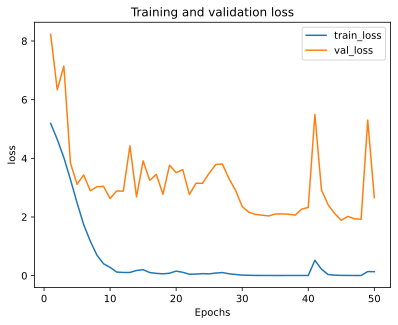

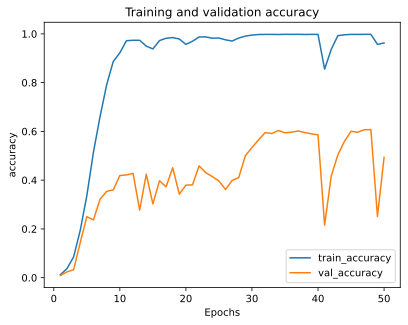

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [ ]:
model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False, pooling='avg')
x = keras.layers.Dense(units=196, activation='softmax')(model.output)
model = keras.models.Model(model.input, x)

for layer in model.layers:
    if 'conv5_block3_1_conv' in layer.name:
        break
    layer.trainable = False

model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1e-3),
              metrics='accuracy')

# Train model on dataset
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    shuffle=False)

Epoch 1/50
254/254 [==============================] - 186s 664ms/step - loss: 3.6916 - accuracy: 0.1992 - val_loss: 3.0411 - val_accuracy: 0.3186
Epoch 2/50
254/254 [==============================] - 157s 618ms/step - loss: 1.5826 - accuracy: 0.5796 - val_loss: 2.3101 - val_accuracy: 0.4396
Epoch 3/50
254/254 [==============================] - 156s 613ms/step - loss: 0.7836 - accuracy: 0.7772 - val_loss: 2.3920 - val_accuracy: 0.4618
Epoch 4/50
254/254 [==============================] - 159s 628ms/step - loss: 0.4127 - accuracy: 0.8846 - val_loss: 2.0098 - val_accuracy: 0.5122
Epoch 5/50
254/254 [==============================] - 162s 637ms/step - loss: 0.2657 - accuracy: 0.9245 - val_loss: 2.0383 - val_accuracy: 0.5416
Epoch 6/50
254/254 [==============================] - 158s 624ms/step - loss: 0.2004 - accuracy: 0.9449 - val_loss: 2.2772 - val_accuracy: 0.5336
Epoch 7/50
254/254 [==============================] - 156s 616ms/step - loss: 0.1464 - accuracy: 0.9594 - val_loss: 2.1528 -

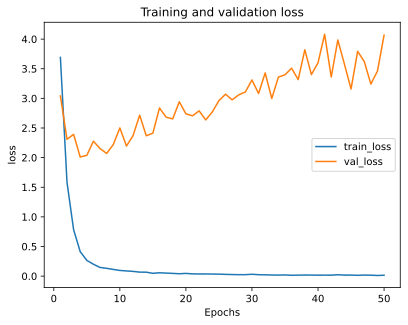

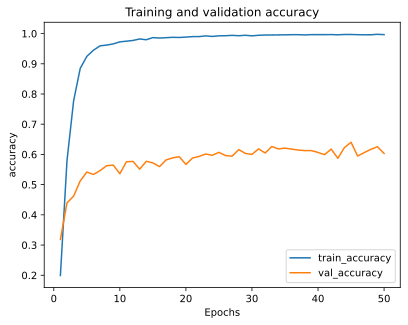

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

# Image Augmentation
https://imgaug.readthedocs.io/en/latest/source/examples_basics.html

In [ ]:
import imgaug as ia
import imgaug.augmenters as iaa

In [ ]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
# image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image.
seq = iaa.Sequential(
    [
        #
        # Apply the following augmenters to most images.
        #
        iaa.Fliplr(0.5), # horizontally flip 50% of all images

        # crop some of the images by 0-10% of their height/width
        sometimes(iaa.Crop(percent=(0, 0.1))),

        # Apply affine transformations to some of the images
        # - scale to 80-120% of image height/width (each axis independently)
        # - translate by -20 to +20 relative to height/width (per axis)
        # - rotate by -45 to +45 degrees
        # - shear by -16 to +16 degrees
        # - order: use nearest neighbour or bilinear interpolation (fast)
        # - mode: use any available mode to fill newly created pixels
        #         see API or scikit-image for which modes are available
        # - cval: if the mode is constant, then use a random brightness
        #         for the newly created pixels (e.g. sometimes black,
        #         sometimes white)
        iaa.Affine(
            scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
            translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
            rotate=(-15, 15),
            shear=(-10, 10),
            order=[0, 1],
            cval=(0, 255),
            mode=ia.ALL
        ),

        #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 5),
            [
                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)),
                    iaa.AverageBlur(k=(2, 7)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                ),

                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-10, 10), per_channel=0.5),

                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5), per_channel=0.5),

                # Improve or worsen the contrast of images.
                iaa.LinearContrast((0.5, 2.0), per_channel=0.5),
            ],
            # do all of the above augmentations in random order
            random_order=True
        )
    ],
    # do all of the above augmentations in random order
    random_order=True
)

In [ ]:
from keras.applications.resnet import preprocess_input

class DataGeneratorAugment(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, batch_size=32, dim=(224, 224), n_channels=3, n_classes=196, shuffle=True, mode='test'):
        'Initialization'
        self.data = data
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.mode = mode
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ind in enumerate(indexes):
            line = self.data[ind][0].split(',')
            class_id = int(line[5]) - 1
            image = cv2.imread('/content/' + line[0])
            image = cv2.resize(image, self.dim)

            if self.mode == 'train':
                image = seq(image=image)

            image = preprocess_input(image)

            # Store sample
            X[i,] = image

            # Store class
            y[i] = class_id

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.data))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [ ]:
train_generator = DataGeneratorAugment(train_list, mode='train')
valid_generator = DataGeneratorAugment(test_list, shuffle=False)

In [ ]:
model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False, pooling='avg')
x = keras.layers.Dropout(0.5)(model.output)
x = keras.layers.Dense(units=num_classes, activation='softmax')(x)
model = keras.models.Model(model.input, x)

#
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1e-3),
              metrics='accuracy')

# Train model on dataset
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    shuffle=False)

Epoch 1/50
254/254 [==============================] - 273s 849ms/step - loss: 5.4199 - accuracy: 0.0041 - val_loss: 78.1802 - val_accuracy: 0.0044
Epoch 2/50
254/254 [==============================] - 211s 830ms/step - loss: 5.3291 - accuracy: 0.0047 - val_loss: 6.1211 - val_accuracy: 0.0065
Epoch 3/50
254/254 [==============================] - 218s 857ms/step - loss: 5.3026 - accuracy: 0.0052 - val_loss: 5.5518 - val_accuracy: 0.0085
Epoch 4/50
254/254 [==============================] - 207s 817ms/step - loss: 5.2808 - accuracy: 0.0053 - val_loss: 5.6155 - val_accuracy: 0.0078
Epoch 5/50
254/254 [==============================] - 218s 858ms/step - loss: 5.2272 - accuracy: 0.0118 - val_loss: 5.2948 - val_accuracy: 0.0102
Epoch 6/50
254/254 [==============================] - 208s 818ms/step - loss: 5.1973 - accuracy: 0.0106 - val_loss: 5.1887 - val_accuracy: 0.0136
Epoch 7/50
254/254 [==============================] - 207s 817ms/step - loss: 5.1784 - accuracy: 0.0125 - val_loss: 5.1363 

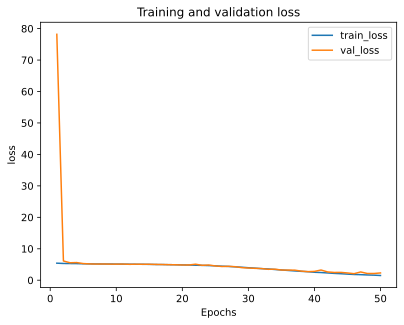

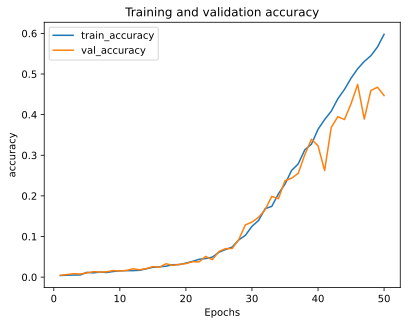

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=20,
                    shuffle=False)

Epoch 1/20
254/254 [==============================] - 207s 817ms/step - loss: 1.4474 - accuracy: 0.6090 - val_loss: 2.2252 - val_accuracy: 0.4665
Epoch 2/20
122/254 [=============>................] - ETA: 1:08 - loss: 1.3553 - accuracy: 0.6201

# Localization
https://imgaug.readthedocs.io/en/latest/source/examples_bounding_boxes.html

In [ ]:
base_model = keras.applications.InceptionResNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

x = base_model.output

# classification
classifier = keras.layers.GlobalAveragePooling2D()(x)
classifier = keras.layers.Dropout(0.5)(classifier)
classifier = keras.layers.Dense(196, activation='softmax', name='classifier')(classifier)

# localization
localizer = keras.layers.Flatten()(x)
localizer = keras.layers.Dropout(0.5)(localizer)
localizer = keras.layers.Dense(128, activation='relu')(localizer)
localizer = keras.layers.Dense(4, name='localizer')(localizer)

#
model = keras.models.Model(base_model.input, [classifier, localizer])

model.summary()
# keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

219070464/219055592 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                

In [ ]:
from keras.applications.resnet50 import preprocess_input

class DataGeneratorLocalization(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, batch_size=32, dim=(224, 224), n_channels=3, n_classes=196, shuffle=True, mode='valid'):
        'Initialization'
        self.data = data
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.mode = mode
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y_classifier = np.empty((self.batch_size), dtype=int)
        y_localizer = np.empty((self.batch_size, 4), dtype=float)

        # Generate data
        for i, ind in enumerate(indexes):
            line = self.data[ind][0].split(',')
            class_id = int(line[5]) - 1
            image = cv2.imread('/content/' + line[0])
            shape = image.shape
            box = np.array([int(line[1]), int(line[2]), int(line[3]), float(line[4])])
            image = cv2.resize(image, self.dim)
            image = preprocess_input(image)

            if self.mode == 'train':
                # Augment BBs and images.
                image, box = seq(image=image, bounding_boxes=box)

            # normalize box
            box[0] /= shape[1]
            box[2] /= shape[1]
            box[1] /= shape[0]
            box[3] /= shape[0]

            # Store sample
            X[i,] = image

            # Store class
            y_classifier[i] = class_id

            #
            y_localizer[i] = box

        y_classifier = keras.utils.to_categorical(y_classifier, num_classes=self.n_classes)

        return X, (y_classifier, y_localizer)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.data))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


In [ ]:
train_generator = DataGeneratorLocalization(train_list)
valid_generator = DataGeneratorLocalization(test_list, shuffle=False)

In [ ]:
X, y = train_generator.__getitem__(10)

In [ ]:
y[1]

array([[0.01179245, 0.425     , 0.99056604, 0.93611111],
       [0.0453125 , 0.17370892, 0.9671875 , 0.88262911],
       [0.06835938, 0.05078125, 0.91796875, 0.96614583],
       [0.07725694, 0.29050926, 0.93952546, 0.67283951],
       [0.05      , 0.07692308, 0.952     , 1.        ],
       [0.06563707, 0.3556701 , 0.95366795, 0.80927835],
       [0.05957031, 0.15541601, 0.8984375 , 0.95290424],
       [0.07      , 0.06832298, 0.98666667, 0.8757764 ],
       [0.12302285, 0.32676056, 0.8172232 , 0.86760563],
       [0.05128205, 0.17175573, 0.95337995, 0.96183206],
       [0.05066667, 0.40405117, 0.928     , 0.89872068],
       [0.22142857, 0.27404719, 0.60816327, 0.7676951 ],
       [0.04247104, 0.18041237, 0.94980695, 0.95876289],
       [0.225     , 0.3962963 , 0.85      , 0.82777778],
       [0.0703125 , 0.27604167, 0.953125  , 0.91145833],
       [0.13235294, 0.05681818, 0.89705882, 0.93181818],
       [0.12195122, 0.24852071, 0.8713969 , 0.82248521],
       [0.21666667, 0.27710843,

In [ ]:
#
model.compile(loss={'classifier': 'categorical_crossentropy',
                    'localizer': 'mse'},
              loss_weights=[1, 1],
              optimizer=keras.optimizers.Adam(lr=1e-3, clipnorm=1e-3, decay=1e-5),
              metrics={'classifier': 'accuracy'})

# Train model on dataset
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50)

Epoch 1/50
254/254 [==============================] - 256s 876ms/step - loss: 5.5432 - classifier_loss: 5.0019 - localizer_loss: 0.5413 - classifier_accuracy: 0.0316 - val_loss: 5.4181 - val_classifier_loss: 5.3448 - val_localizer_loss: 0.0733 - val_classifier_accuracy: 0.0259
Epoch 2/50
254/254 [==============================] - 226s 889ms/step - loss: 2.1951 - classifier_loss: 2.1648 - localizer_loss: 0.0303 - classifier_accuracy: 0.4471 - val_loss: 2.6045 - val_classifier_loss: 2.5697 - val_localizer_loss: 0.0348 - val_classifier_accuracy: 0.3943
Epoch 3/50
254/254 [==============================] - 226s 891ms/step - loss: 0.8471 - classifier_loss: 0.8315 - localizer_loss: 0.0156 - classifier_accuracy: 0.7713 - val_loss: 1.6567 - val_classifier_loss: 1.6444 - val_localizer_loss: 0.0123 - val_classifier_accuracy: 0.5604
Epoch 4/50
254/254 [==============================] - 227s 892ms/step - loss: 0.4175 - classifier_loss: 0.4070 - localizer_loss: 0.0106 - classifier_accuracy: 0.8872 

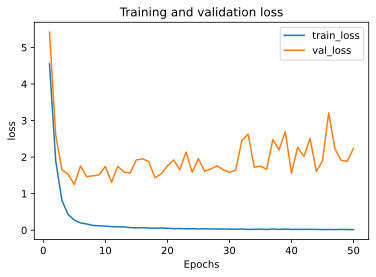

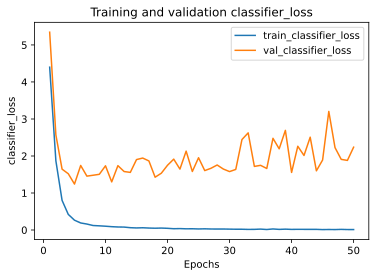

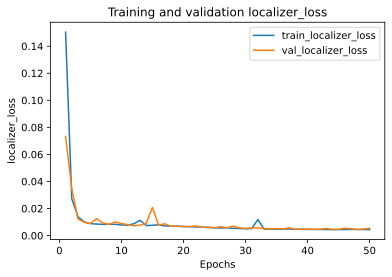

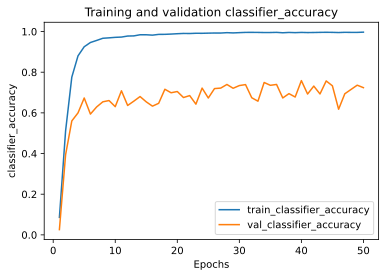

In [ ]:
plot_metric(history, 'loss')
plot_metric(history, 'classifier_loss')
plot_metric(history, 'localizer_loss')
plot_metric(history, 'classifier_accuracy')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/Datasets/Cars/model_classification_localization.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Datasets/Cars/model_classification_localization.h5")
print("Saved model to disk")

Saved model to disk


# Use Trained Model

In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/Datasets/Cars/model_classification_localization.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Datasets/Cars/model_classification_localization.h5")
print("Loaded model from disk")

/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


OSError: ignored

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://0e08992d39a4e27e7fbe-4dc9a96817496b62ed490e0b349d9413.ssl.cf1.rackcdn.com/1C4BJWDG9CL200944/714c7e04a27eeb59891ddab496135153.jpg', 'image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x7ff3b6f932b0>)

In [ ]:
from keras.applications.resnet50 import preprocess_input

image_org = cv2.imread('image.jpg')
image = cv2.resize(image_org, (224, 224))
image = preprocess_input(image)

In [ ]:
scores, boxes = loaded_model.predict(np.expand_dims(image, axis=0))
scores = scores[0]
box = boxes[0]
arg = np.argsort(-scores)
for i in range(5):
  print('{:.3f} : {}'.format(scores[arg[i]], class_names[arg[i]]))

1.000 : Jeep Wrangler SUV 2012
0.000 : AM General Hummer SUV 2000
0.000 : Chevrolet HHR SS 2010
0.000 : Chevrolet Corvette Convertible 2012
0.000 : Spyker C8 Convertible 2009


In [ ]:
box

array([0.10591565, 0.181411  , 0.9194229 , 0.8729758 ], dtype=float32)

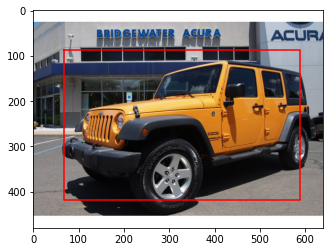

In [ ]:
plt.imshow(image_org[:, :, ::-1])
x1, x2 = box[0::2] * image_org.shape[1]
y1, y2 = box[1::2] * image_org.shape[0]
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r')